In [1]:
#신경망 모델 훈련
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#모델만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [4]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 모델의 손실함수를 구성 및 모델 훈련
# verbose 매개변수는 훈련과정 출력을 조절한다. 기본값인 1은 에포크마다 막대와 지표를 보여주고, 2는 막대생략, 0은 훈련과정 자체를 생략해준다.
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [6]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


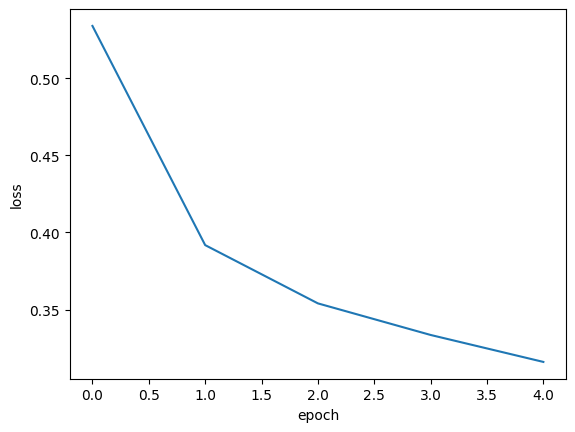

In [7]:
# loss 를 그래프로 그려보자.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

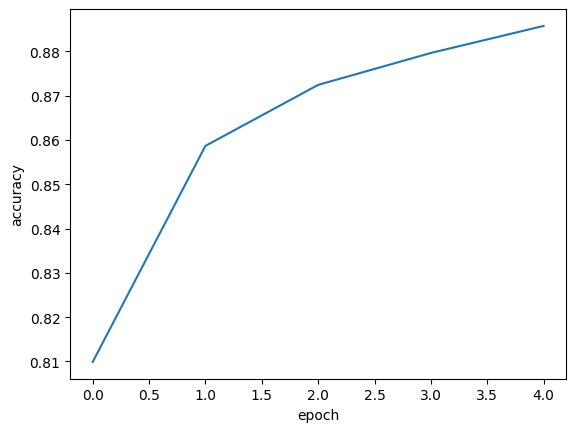

In [8]:
# accuracy를 그래프로 그려보자.
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5343 - accuracy: 0.8133
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3930 - accuracy: 0.8591
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3568 - accuracy: 0.8715
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3330 - accuracy: 0.8800
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3170 - accuracy: 0.8855
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3051 - accuracy: 0.8909
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2962 - accuracy: 0.8948
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2887 - accuracy: 0.8964
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2797 - accuracy: 0.9014
Epoch 10/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.27

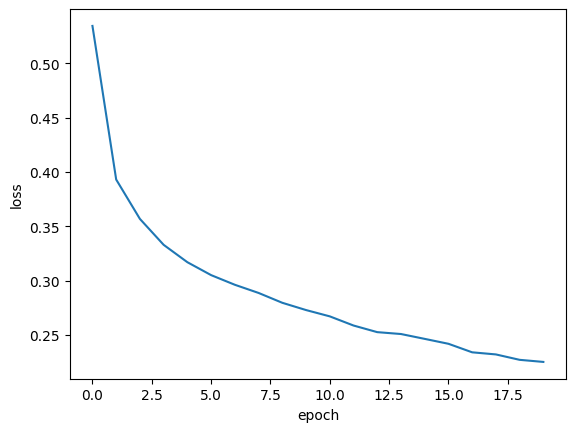

In [9]:
# 손실값이 줄어들고 정확도는 더욱 높아지니 epoch를 늘려서 최대치가 나오는 걸 확인해보자.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [4]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5297 - accuracy: 0.8128 - val_loss: 0.4534 - val_accuracy: 0.8387
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3914 - accuracy: 0.8592 - val_loss: 0.3896 - val_accuracy: 0.8580
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3533 - accuracy: 0.8736 - val_loss: 0.3596 - val_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3333 - accuracy: 0.8811 - val_loss: 0.3368 - val_accuracy: 0.8798
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3161 - accuracy: 0.8871 - val_loss: 0.3750 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3050 - accuracy: 0.8906 - val_loss: 0.3846 - val_accuracy: 0.8695
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2968 - accuracy: 0.8949 - val_loss: 0.3466 - val_accuracy:

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


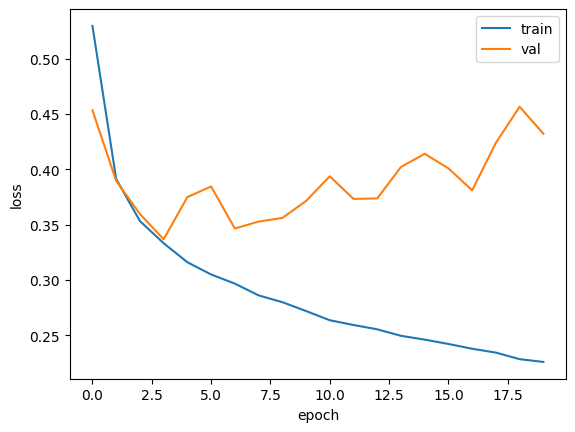

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show() #과대적합

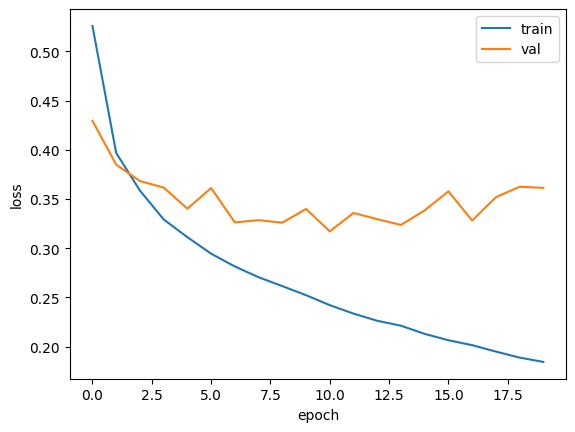

In [10]:
# 과대적합을 막기위해서 규제를 사용해보자.
# RMSprop
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                      validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 어느정도 과대적합이 해소되었지만 충분히 해소되지 않아 여전히 과대적합이라고 볼 수 있기에 Dropout기법을 추가해보자.

In [11]:
# 드롭아웃이란 일부 뉴런을 랜덤하게 꺼서 출력되지 않게 만들어주는 방법이다.
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


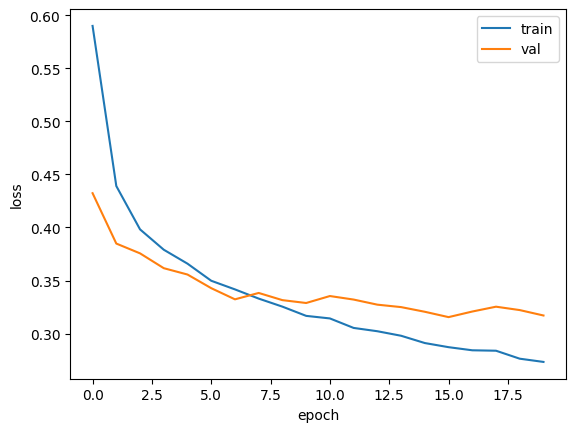

In [13]:
# 드롭아웃 적용한 모델을 훈련시키기.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 과대적합이 사라지고 loss값이 정상적으로 내려간 것을 확인할 수 있다.

In [14]:
# 모델을 저장하고 불러오기

#일단 모델훈련하기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [15]:
# 모델 저장하기1
# 모델의 파라미터만 저장하는 save_weight()
# 확장자가 h5인 경우에 HDF5 포맷으로 저장한다.
model.save_weights('model-weights.h5')

In [16]:
# 모델 저장하기2
# 모델구조, 파라미터를 함께 저장하는 save()
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# 두개의 파일이 만들어졌는지 확인
# 셸 명령어를 사용할 때는 !를 사용한다.
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Jan 17 09:00 model-weights.h5
-rw-r--r-- 1 root root 981176 Jan 17 09:01 model-whole.h5


In [19]:
# 훈련하지 않은 새로운 모델을 만들고 저장해둔 model-weights.h5 파일에서 파라미터 사용해보기
# load_weights()
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [20]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.8823333333333333


In [24]:
# 콜백 사용하기
# 콜백은 훈련과정중간에 어떤 작업을 수행할 수 있게 하는 객체로keras.callbalcks 패키지 아래에 있는 클래스들 입니다. fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다.

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                 save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[[checkpoint_cb]])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.8873


[0.3122684061527252, 0.887333333492279]

In [26]:
# early stopping (조기종료)는 훈련 에포크 횟수를 제한하는 역할ㅇ지만 모델이 과대적합이 되는 것을 막아주기 때문에 규제 방법 중 하나로 생각될 수 있다.
# 과대적합이 시작되기 전에 훈련을 미리 중지하는 것이 핵심이다.
# 적용해보기
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                   restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# 멈춘 시점 확인
print(early_stopping_cb.stopped_epoch)

9


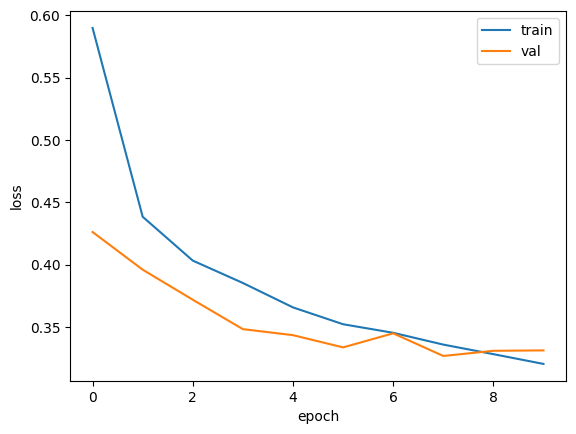

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [29]:
# 검증세트에 대한 성능확인해보기
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3268 - accuracy: 0.8797


[0.32678255438804626, 0.8796666860580444]